Business Analysis with Python following <a href = "https://www.youtube.com/watch?v=eMOA1pPVUc4&list=WL"> Solving real world data science tasks with Python Pandas! <a>

In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns

In [2]:
path = "./Sales_Data/"
os.listdir(path)

['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

In [3]:
all_data = pd.DataFrame()

# files = [file for file in os.listdir(path)]
# for file in files:

for file in os.listdir(path):
    data = path+file
    current_data = pd.read_csv(data)
    all_data = pd.concat([all_data, current_data])
    

In [4]:
all_data.sample(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
8829,149647,Lightning Charging Cable,1,14.95,01/02/19 15:32,"226 Cherry St, Boston, MA 02215"
2002,211818,Apple Airpods Headphones,1,150,06/09/19 18:28,"854 11th St, Dallas, TX 75001"
7736,148605,Google Phone,1,600,01/25/19 12:51,"179 Cedar St, Portland, OR 97035"
1141,237769,Wired Headphones,1,11.99,08/04/19 20:09,"933 12th St, Dallas, TX 75001"
10350,246575,AA Batteries (4-pack),2,3.84,08/11/19 08:42,"247 Cherry St, Los Angeles, CA 90001"
11391,306531,Flatscreen TV,1,300,12/30/19 12:01,"208 Sunset St, Portland, OR 97035"
7001,285494,20in Monitor,1,109.99,11/05/19 00:21,"512 Meadow St, Los Angeles, CA 90001"
13485,291682,Lightning Charging Cable,1,14.95,11/19/19 08:30,"214 Dogwood St, New York City, NY 10001"
14429,207824,iPhone,1,700,05/26/19 12:34,"846 South St, Portland, OR 97035"
7943,148806,Flatscreen TV,1,300,01/15/19 19:14,"720 Sunset St, Portland, OR 97035"


In [5]:
all_data.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [6]:
all_data = all_data.dropna()
# all_data = all_data[all_data.notnull()]
all_data.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [7]:
all_data[all_data.isnull()]  #somehow會全部都是NaN無法check

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
11681,NaN,NaN,NaN,NaN,NaN,NaN
11682,NaN,NaN,NaN,NaN,NaN,NaN
11683,NaN,NaN,NaN,NaN,NaN,NaN
11684,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [9]:
# all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered']) Error

In [10]:
all_data.iloc[510:520,:]
#因為我沒有先匯出成csv重新讀進來，所以column name重複出現嗎?

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
512,177048,Bose SoundSport Headphones,1,99.99,04/12/19 21:23,"432 5th St, New York City, NY 10001"
513,177049,Wired Headphones,1,11.99,04/03/19 06:55,"154 Dogwood St, San Francisco, CA 94016"
514,177050,Apple Airpods Headphones,1,150,04/08/19 09:53,"510 Elm St, Boston, MA 02215"
515,177051,Wired Headphones,2,11.99,04/07/19 08:41,"777 Adams St, Boston, MA 02215"
516,177052,USB-C Charging Cable,2,11.95,04/02/19 09:30,"532 Walnut St, San Francisco, CA 94016"
517,177053,Wired Headphones,1,11.99,04/24/19 20:45,"5 Adams St, Boston, MA 02215"
518,177054,Apple Airpods Headphones,1,150,04/09/19 19:18,"800 Jackson St, Atlanta, GA 30301"
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
520,177055,Lightning Charging Cable,1,14.95,04/09/19 12:37,"59 Forest St, Atlanta, GA 30301"
521,177056,Flatscreen TV,1,300,04/20/19 23:52,"180 9th St, San Francisco, CA 94016"


In [11]:
all_data = all_data[all_data['Order ID'] != 'Order ID']

In [12]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])

In [13]:
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

In [14]:
all_data.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
dtype: object

In [15]:
all_data.iloc[0,:]['Order Date'][0:2]

'04'

In [16]:
all_data['Month'] = all_data['Order Date'][0:2]

In [17]:
all_data['Month'] = all_data['Order Date'].str[0:2]

In [18]:
all_data['Month'] = all_data['Order Date'].str[0:2].astype('int')

In [19]:
all_data.groupby('Month').sum()

,Quantity Ordered,Price Each
Month,,
1,10903,1.811768e+06
2,13449,2.188885e+06
3,17005,2.791208e+06
4,20558,3.367671e+06
5,18667,3.135125e+06
6,15253,2.562026e+06
7,16072,2.632540e+06
8,13448,2.230345e+06
9,13109,2.084992e+06


In [20]:
all_data['Sales'] = all_data['Quantity Ordered'].astype('int') * all_data['Price Each'].astype('float')

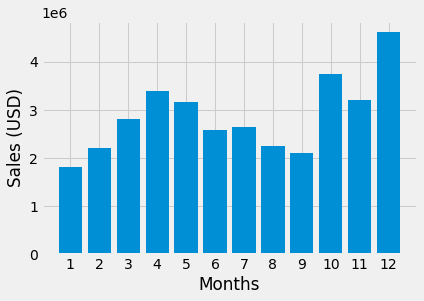

In [21]:
import matplotlib.pyplot as plt
from matplotlib import style

# style.use('dark_background') using at dark mode
plt.style.use('fivethirtyeight')
months = range(1,13)
plt.bar(months, all_data.groupby('Month').sum()['Sales'])
plt.xlabel('Months')
plt.ylabel('Sales (USD)')
plt.xticks(months)
plt.show()

In [22]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [23]:
all_data.iloc[1,:]['Purchase Address'].split(',')[1]

' Boston'

In [24]:
all_data['City'] = all_data['Purchase Address'].apply(lambda x:x.split(',')[1])

In [25]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [26]:
all_data['City'] = all_data['Purchase Address'].apply(lambda x:f"{x.split(', ')[1]} ({x.split(', ')[2][0:2]})")

In [27]:
#原po作法
def get_city(x):
    return x.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(" ")[1] #因為前面還有一個空格

all_data['City2'] = all_data['Purchase Address'].apply(lambda x:f"{get_city(x)} ({get_state(x)})")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,City2
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),Los Angeles (CA)


In [28]:
all_data.groupby('City').sum().reset_index('City')

,City,Quantity Ordered,Price Each,Month,Sales
0,Atlanta (GA),16602,2.779908e+06,104794,2.795499e+06
1,Austin (TX),11153,1.809874e+06,69829,1.819582e+06
2,Boston (MA),22528,3.637410e+06,141112,3.661642e+06
3,Dallas (TX),16730,2.752628e+06,104620,2.767975e+06
4,Los Angeles (CA),33289,5.421435e+06,208325,5.452571e+06
5,New York City (NY),27932,4.635371e+06,175741,4.664317e+06
6,Portland (ME),2750,4.471893e+05,17144,4.497583e+05
7,Portland (OR),11303,1.860558e+06,70621,1.870732e+06
8,San Francisco (CA),50239,8.211462e+06,315520,8.262204e+06
9,Seattle (WA),16553,2.733296e+06,104941,2.747755e+06


In [29]:
all_data.groupby('City').sum() #注意City的位子

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2.779908e+06,104794,2.795499e+06
Austin (TX),11153,1.809874e+06,69829,1.819582e+06
Boston (MA),22528,3.637410e+06,141112,3.661642e+06
Dallas (TX),16730,2.752628e+06,104620,2.767975e+06
Los Angeles (CA),33289,5.421435e+06,208325,5.452571e+06
New York City (NY),27932,4.635371e+06,175741,4.664317e+06
Portland (ME),2750,4.471893e+05,17144,4.497583e+05
Portland (OR),11303,1.860558e+06,70621,1.870732e+06
San Francisco (CA),50239,8.211462e+06,315520,8.262204e+06


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

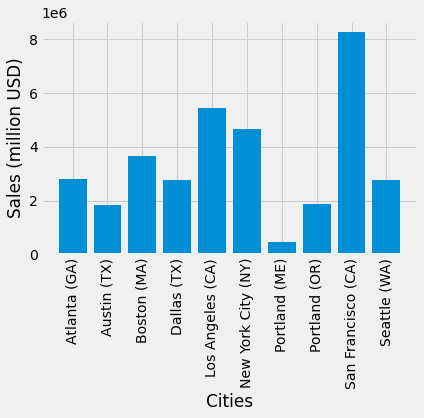

In [30]:
city_sum = all_data.groupby('City').sum().reset_index('City') #reset_index = ungroup
plt.bar(city_sum['City'], city_sum['Sales'])   #沒有reset_index的話沒辦法選['City']
plt.xlabel('Cities')
plt.ylabel('Sales (million USD)')
plt.xticks(rotation = 'vertical')

In [31]:
#原po作法:
keys = [city for city in all_data.groupby('City')]
keys
#每個city return一個df

[('Atlanta (GA)',
        Order ID                     Product  Quantity Ordered  Price Each  \
  8       176564        USB-C Charging Cable                 1       11.95   
  15      176571    Lightning Charging Cable                 1       14.95   
  27      176582  Bose SoundSport Headphones                 1       99.99   
  36      176589    Lightning Charging Cable                 1       14.95   
  70      176623            27in FHD Monitor                 1      149.99   
  ...        ...                         ...               ...         ...   
  11642   259316      AAA Batteries (4-pack)                 1        2.99   
  11646   259320             ThinkPad Laptop                 1      999.99   
  11655   259329    Lightning Charging Cable                 1       14.95   
  11658   259332    Apple Airpods Headphones                 1      150.00   
  11660   259334        USB-C Charging Cable                 1       11.95   
  
             Order Date                    

In [32]:
keys = [city for city, df in all_data.groupby('City')] #這樣畫圖順序才會對
keys

['Atlanta (GA)',
 'Austin (TX)',
 'Boston (MA)',
 'Dallas (TX)',
 'Los Angeles (CA)',
 'New York City (NY)',
 'Portland (ME)',
 'Portland (OR)',
 'San Francisco (CA)',
 'Seattle (WA)']

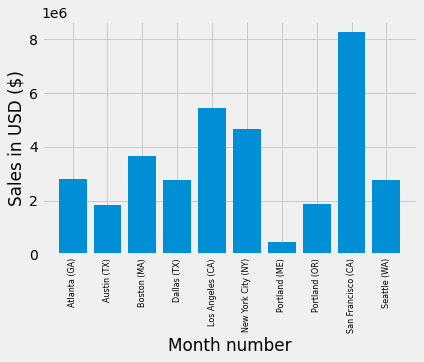

In [33]:
plt.bar(keys,all_data.groupby(['City']).sum()['Sales'])
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

In [34]:
# all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])
# all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Hour'] = all_data['Order Date'].str[-5:-3].astype('int')

In [35]:
all_data['Count'] = 1

In [36]:
all_data.groupby('Hour').size()

Hour
0      3910
1      2350
2      1243
3       831
4       854
5      1321
6      2482
7      4011
8      6256
9      8748
10    10944
11    12411
12    12587
13    12129
14    10984
15    10175
16    10384
17    10899
18    12280
19    12905
20    12228
21    10921
22     8822
23     6275
dtype: int64

In [37]:
all_data.groupby('Hour').count() #原po先建一個col = 'Count'再sum()
# all_data.groupby('Hour').sum()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,City2,Count
Hour,,,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256


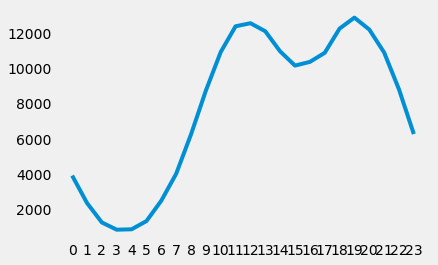

In [38]:
# keys = [pair for pair, df in all_data.groupby(['Hour'])]
# plt.plot(keys, all_data.groupby(['Hour']).count()['Count'])



hours_count = all_data.groupby('Hour').size()
plt.plot(hours_count)
plt.xticks(range(0,24))
plt.grid()
plt.show()

In [39]:
all_data['Product'].unique()

array(['USB-C Charging Cable', 'Bose SoundSport Headphones',
       'Google Phone', 'Wired Headphones', 'Macbook Pro Laptop',
       'Lightning Charging Cable', '27in 4K Gaming Monitor',
       'AA Batteries (4-pack)', 'Apple Airpods Headphones',
       'AAA Batteries (4-pack)', 'iPhone', 'Flatscreen TV',
       '27in FHD Monitor', '20in Monitor', 'LG Dryer', 'ThinkPad Laptop',
       'Vareebadd Phone', 'LG Washing Machine', '34in Ultrawide Monitor'],
      dtype=object)

In [40]:
#Method 1
all_data['USB-C Charging Cable'] = np.where('USB-C Charging Cable' == all_data['Product'], 1, 0)

In [41]:
# for product in all_data['Product'].unique():
#     all_data[product] = np.where(product == all_data['Product'], 1, 0)
    
# all_data

In [43]:
#Method 2
dummies = pd.get_dummies(all_data['Product'])
# pd.concat([all_data, dummies], axis = 1)
co_temp = pd.concat([all_data['Order ID'], dummies], axis = 1).groupby('Order ID').sum().reset_index('Order ID')
co_temp2 = co_temp.iloc[:,1:]

mask = co_temp.sum(axis=1)>1
co_temp3 = co_temp.loc[mask,:].iloc[:,1:]

co_temp2[co_temp2>1] = 1
co_temp3[co_temp3>1] = 1
co_occur = co_temp3.T.dot(co_temp3)

In [44]:
co_occur 
#原本時好時不好
 #目前測起來應該是pd.to_datetime有跑的話會怪怪的

,20in Monitor,27in 4K Gaming Monitor,27in FHD Monitor,34in Ultrawide Monitor,AA Batteries (4-pack),AAA Batteries (4-pack),Apple Airpods Headphones,Bose SoundSport Headphones,Flatscreen TV,Google Phone,LG Dryer,LG Washing Machine,Lightning Charging Cable,Macbook Pro Laptop,ThinkPad Laptop,USB-C Charging Cable,Vareebadd Phone,Wired Headphones,iPhone
20in Monitor,156,2,5,2,16,11,13,15,2,4,0,2,26,6,2,25,0,19,3
27in 4K Gaming Monitor,2,246,8,6,26,30,22,19,5,6,2,1,34,13,5,23,3,29,9
27in FHD Monitor,5,8,29,10,26,43,24,26,6,8,3,1,36,9,6,43,2,22,2
34in Ultrawide Monitor,2,6,10,239,32,25,14,17,8,5,0,1,33,7,4,26,4,28,13
AA Batteries (4-pack),16,26,26,32,221,87,70,55,21,25,6,1,106,17,17,75,12,83,32
AAA Batteries (4-pack),11,30,43,25,87,255,81,57,21,22,2,4,80,18,27,95,6,86,31
Apple Airpods Headphones,13,22,24,14,70,81,182,50,13,21,3,1,116,19,16,63,12,100,117
Bose SoundSport Headphones,15,19,26,17,55,57,50,25,13,228,0,2,72,15,13,102,82,74,12
Flatscreen TV,2,5,6,8,21,21,13,13,172,4,1,0,22,5,6,17,3,11,10
Google Phone,4,6,8,5,25,22,21,228,4,100,1,1,28,7,6,229,5,166,9


In [59]:
# products = all_data['Product']
# products_component = products.str.extract(r'(?<=\[)(.*)(?=\])')
# products_component.iloc[0].str.split(',')
# pd.get_dummies(products)
#結果這是同一個東西 因為格式關係分開以為是不同的...

In [113]:
# co_occur.cov() Covariance Matrix without Rescaling
co_occur_rate = co_occur/np.diag(co_occur)
co_occur_rate = co_occur_rate.round(2)
co_occur_rate

,20in Monitor,27in 4K Gaming Monitor,27in FHD Monitor,34in Ultrawide Monitor,AA Batteries (4-pack),AAA Batteries (4-pack),Apple Airpods Headphones,Bose SoundSport Headphones,Flatscreen TV,Google Phone,LG Dryer,LG Washing Machine,Lightning Charging Cable,Macbook Pro Laptop,Product,ThinkPad Laptop,USB-C Charging Cable,Vareebadd Phone,Wired Headphones,iPhone
20in Monitor,1.00,0.01,0.02,0.01,0.02,0.01,0.01,0.02,0.01,0.00,0.00,0.07,0.01,0.03,0.0,0.01,0.01,0.00,0.01,0.00
27in 4K Gaming Monitor,0.01,1.00,0.03,0.03,0.04,0.04,0.02,0.02,0.03,0.00,0.08,0.04,0.02,0.07,0.0,0.03,0.01,0.00,0.02,0.00
27in FHD Monitor,0.03,0.03,1.00,0.04,0.04,0.06,0.03,0.03,0.03,0.00,0.12,0.04,0.02,0.05,0.0,0.03,0.02,0.00,0.01,0.00
34in Ultrawide Monitor,0.01,0.02,0.04,1.00,0.04,0.03,0.01,0.02,0.05,0.00,0.00,0.04,0.02,0.04,0.0,0.02,0.01,0.01,0.02,0.01
AA Batteries (4-pack),0.10,0.11,0.09,0.13,1.00,0.11,0.07,0.07,0.12,0.02,0.24,0.04,0.06,0.09,0.0,0.10,0.04,0.02,0.05,0.02
AAA Batteries (4-pack),0.07,0.12,0.15,0.10,0.12,1.00,0.09,0.07,0.12,0.01,0.08,0.14,0.05,0.09,0.0,0.16,0.05,0.01,0.05,0.02
Apple Airpods Headphones,0.08,0.09,0.08,0.06,0.10,0.11,1.00,0.06,0.08,0.01,0.12,0.04,0.07,0.10,0.0,0.09,0.03,0.02,0.06,0.20
Bose SoundSport Headphones,0.10,0.08,0.09,0.07,0.08,0.07,0.05,1.00,0.08,0.14,0.00,0.07,0.04,0.08,0.0,0.07,0.05,0.14,0.05,0.01
Flatscreen TV,0.01,0.02,0.02,0.03,0.03,0.03,0.01,0.02,1.00,0.00,0.04,0.00,0.01,0.03,0.0,0.03,0.01,0.00,0.01,0.01
Google Phone,0.03,0.02,0.03,0.02,0.03,0.03,0.02,0.29,0.02,1.00,0.04,0.04,0.02,0.04,0.0,0.03,0.48,0.01,0.26,0.00


In [117]:
co_occur_rate[co_occur_rate<1].max()

20in Monitor                  0.17
27in 4K Gaming Monitor        0.14
27in FHD Monitor              0.15
34in Ultrawide Monitor        0.14
AA Batteries (4-pack)         0.14
AAA Batteries (4-pack)        0.12
Apple Airpods Headphones      0.39
Bose SoundSport Headphones    0.29
Flatscreen TV                 0.13
Google Phone                  0.61
LG Dryer                      0.24
LG Washing Machine            0.21
Lightning Charging Cable      0.57
Macbook Pro Laptop            0.11
Product                       0.00
ThinkPad Laptop               0.16
USB-C Charging Cable          0.48
Vareebadd Phone               0.61
Wired Headphones              0.28
iPhone                        0.54
dtype: float64

In [118]:
co_occur_rate[co_occur_rate<1].idxmax()
#對照一下我們可以發現有買Vareebadd Phone跟人有61%有買USB-C Charging Cable

20in Monitor                  Lightning Charging Cable
27in 4K Gaming Monitor        Lightning Charging Cable
27in FHD Monitor                AAA Batteries (4-pack)
34in Ultrawide Monitor        Lightning Charging Cable
AA Batteries (4-pack)         Lightning Charging Cable
AAA Batteries (4-pack)            USB-C Charging Cable
Apple Airpods Headphones                        iPhone
Bose SoundSport Headphones                Google Phone
Flatscreen TV                 Lightning Charging Cable
Google Phone                      USB-C Charging Cable
LG Dryer                         AA Batteries (4-pack)
LG Washing Machine            Lightning Charging Cable
Lightning Charging Cable                        iPhone
Macbook Pro Laptop            Lightning Charging Cable
Product                                   20in Monitor
ThinkPad Laptop                 AAA Batteries (4-pack)
USB-C Charging Cable                      Google Phone
Vareebadd Phone                   USB-C Charging Cable
Wired Head

In [65]:
# https://stackoverflow.com/questions/43348194/pandas-select-rows-if-id-appear-several-time

df = all_data[all_data['Order ID'].duplicated(keep=False)] #shift+tab to open help window
#remain with duplicated Order ID
#如果用keep = 'first'的話就會只留下有重複的其中的一筆

# Referenced: https://stackoverflow.com/questions/27298178/concatenate-strings-from-several-rows-using-pandas-groupby
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df2 = df[['Order ID', 'Grouped']].drop_duplicates()

<ipython-input-65-72450ca6486f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


In [66]:
df2

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
11617,259296,"Apple Airpods Headphones,Apple Airpods Headphones"
11619,259297,"iPhone,Lightning Charging Cable,Lightning Char..."
11627,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
11639,259314,"Wired Headphones,AAA Batteries (4-pack)"


In [67]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

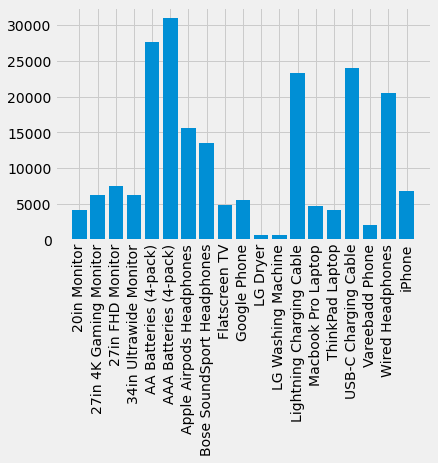

In [71]:
quantities = all_data.groupby('Product').sum().reset_index()['Quantity Ordered']
products = all_data.groupby('Product').sum().reset_index()['Product']

plt.bar(products, quantities)
plt.xticks(rotation = 'vertical')

In [57]:
# product_group = all_data.groupby('Product')
# quantity_ordered = product_group.sum()['Quantity Ordered']

# keys = [pair for pair, df in product_group]
# plt.bar(keys, quantity_ordered)
# plt.xticks(keys, rotation='vertical', size=8)
# plt.show()

In [60]:
all_data.groupby('Product').mean()['Price Each']

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

<ipython-input-108-5f1e172497db>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation = 'vertical')


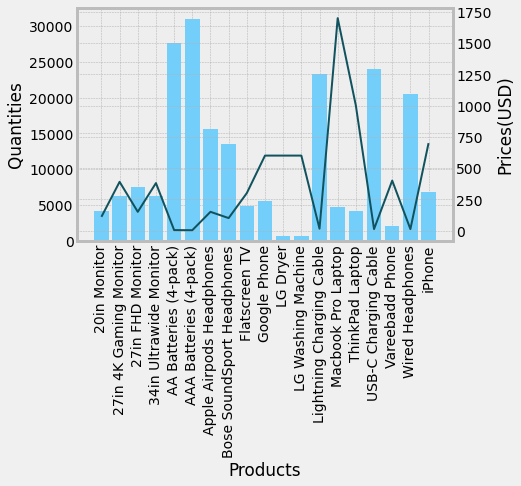

In [108]:
plt.style.use('bmh')
prices = all_data.groupby('Product').mean().reset_index('Product')['Price Each']
quantities = all_data.groupby('Product').sum().reset_index()['Quantity Ordered']
products = all_data.groupby('Product').sum().reset_index()['Product']

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.bar(products, quantities, color = "#73CEF9")
ax2.plot(products, prices, color = '#10535F')

#color: https://www.sessions.edu/color-calculator/
#color: https://www.palettable.io/73CEF9-2C6174-463B47

ax1.set_xlabel('Products')
ax1.set_ylabel('Quantities')
ax2.set_ylabel('Prices(USD)')
ax1.set_xticklabels(products, rotation = 'vertical')

plt.show()